### 1.Displaying missing values in each column. As we can see, we have none. 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
loan_df = pd.read_csv("loan_data.csv")

In [31]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 2.Displaying the number of rows and columns and statistical summary for numerical variables. 

In [32]:
# Display the number of rows and columns in the dataset
print("Number of rows and columns:", loan_df.shape)

Number of rows and columns: (9578, 14)


In [33]:
# Display summary statistics for numerical variables
print(loan_df.describe())

       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.0000

### 3.Displaying missing values in each column. As we can see, we have none. 

In [34]:
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


### 4.Visualizing the distribution of target variable “not.fully.paid”

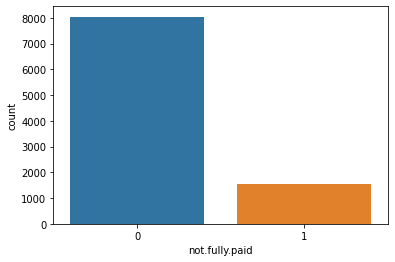

In [35]:
sns.countplot(x="not.fully.paid", data=loan_df)
plt.show()

### 5.Visualizing the correlation between variables.

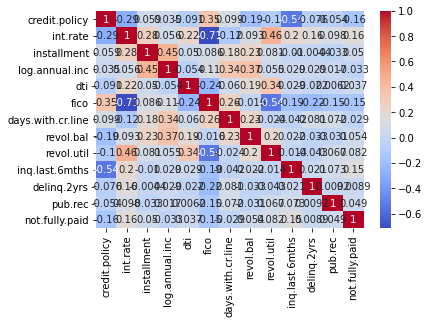

In [36]:
corr = loan_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

### 6.Understanding loan purpose distribution.

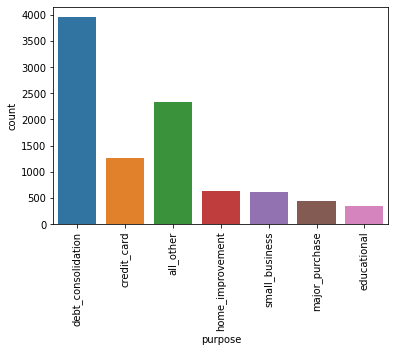

In [37]:
sns.countplot(x="purpose", data=loan_df)
plt.xticks(rotation=90)
plt.show()

### 7.Understanding the distribution of interest rates by loan purpose.

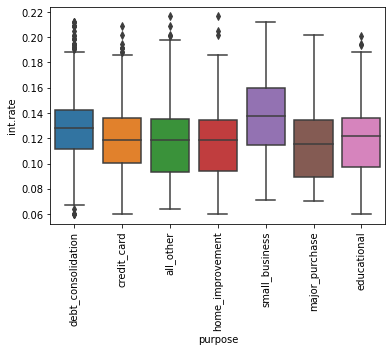

In [38]:
sns.boxplot(x="purpose", y="int.rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

### Feature Engineering
Instead of preprocessing and cleaning the data, we will perform feature engineering to simplify the preprocessing task. 

In [39]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]

### Preprocessing and Balancing the Data
Again, ChatGPT knows the context of the project. We don't have to explain everything again. So, we will simply ask it to write a Python code to clean and preprocess the data. 

Follow-up Prompt: “Now write a python code to clean and preprocess the dataset”

1.Dropping unnecessary columns and converting the categorical variables to numerical ones.

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

loan_df = loan_df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
loan_df['not.fully.paid'] = le.fit_transform(loan_df['not.fully.paid'])


2.Scaling the numerical features using Standard Scaler. 

In [41]:
scaler = StandardScaler()
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_history','installment_to_income_ratio']
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

3.Handling class imbalancing using imblearn’s oversampling method. 

In [42]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

loan_df = pd.concat([X_resampled, y_resampled], axis=1)
loan_df['not.fully.paid'].value_counts()

1    8045
0    8045
Name: not.fully.paid, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Model Selection
In this part, we have asked ChatGPT to train the data on various models for a model selection task.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))


Decision Tree Classifier Accuracy: 81.21%
Random Forest Classifier Accuracy: 89.14%
Logistic Regression Classifier Accuracy: 61.32%
Support Vector Machine Classifier Accuracy: 66.54%


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.linear_model import LogisticRegression


In [48]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.svm import SVC


In [50]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


### Hyperparameter Tuning and Model Evaluation 
We will be selecting the better-performing model and performing the model evaluation. We have specified the use of accuracy, precision, recall, and F1 score as metrics and cross-validation to ensure the model stability.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Best hyperparameters:", best_params)

### Creating a Web App using Gradio
Now comes the most fun part. We will only use prompts to create a fully customizable web app that will take numerical input and display the results using a machine-learning model. 

ChatGPT already knows the context, so we need to just ask it to write a Gradio web app for the loan data classifier. 

In [ ]:
import gradio as gr
import joblib
# Load the trained model
model = joblib.load("loan_classifier.joblib")


def predict_loan_status(
    int_rate,
    installment,
    log_annual_inc,
    dti,
    fico,
    revol_bal,
    revol_util,
    inq_last_6mths,
    delinq_2yrs,
    pub_rec,
    installment_to_income_ratio,
    credit_history,
):
    input_dict = {
        "int.rate": int_rate,
        "installment": installment,
        "log.annual.inc": log_annual_inc,
        "dti": dti,
        "fico": fico,
        "revol.bal": revol_bal,
        "revol.util": revol_util,
        "inq.last.6mths": inq_last_6mths,
        "delinq.2yrs": delinq_2yrs,
        "pub.rec": pub_rec,
        "installment_to_income_ratio": installment_to_income_ratio,
        "credit_history": credit_history,
    }
    # Convert the dictionary to a 2D array
    input_array = [list(input_dict.values())]
    prediction = model.predict(input_array)[0]

    if prediction == 0:
        return "Loan fully paid"
    else:
        return "Loan not fully paid"


inputs = [
    gr.Slider(0.06, 0.23, step=0.01, label="Interest Rate"),
    gr.Slider(100, 950, step=10, label="Installment"),
    gr.Slider(7, 15, step=0.1, label="Log Annual Income"),
    gr.Slider(0, 40, step=1, label="DTI Ratio"),
    gr.Slider(600, 850, step=1, label="FICO Score"),
    gr.Slider(0, 120000, step=1000, label="Revolving Balance"),
    gr.Slider(0, 120, step=1, label="Revolving Utilization"),
    gr.Slider(0, 10, step=1, label="Inquiries in Last 6 Months"),
    gr.Slider(0, 20, step=1, label="Delinquencies in Last 2 Years"),
    gr.Slider(0, 10, step=1, label="Public Records"),
    gr.Slider(0, 5, step=0.1, label="Installment to Income Ratio"),
    gr.Slider(0, 1, step=0.01, label="Credit History"),
]
outputs = [gr.Label(num_top_classes=2)]

title = "Loan Approval Classifier"
description = (
    "Enter the details of the loan applicant to check if the loan is approved or not."
)
gr.Interface(
    fn=predict_loan_status,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
).launch()

In [ ]:
scalar = joblib.load('std_scaler.bin')

In [ ]:
input_array = [list(input_dict.values())]
scaled_array = scalar.transform(input_array)
prediction = model.predict(scaled_array)[0]